In [21]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [22]:
df = pd.read_csv("HR-Employee-Attrition.csv")
df = df.dropna()
df = df.drop_duplicates()

print(df.head())


   Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

           ...           RelationshipSatisfaction StandardHours  \
0      

In [23]:
print(df.describe())

               Age    DailyRate  DistanceFromHome    Education  EmployeeCount  \
count  1470.000000  1470.000000       1470.000000  1470.000000         1470.0   
mean     36.923810   802.485714          9.192517     2.912925            1.0   
std       9.135373   403.509100          8.106864     1.024165            0.0   
min      18.000000   102.000000          1.000000     1.000000            1.0   
25%      30.000000   465.000000          2.000000     2.000000            1.0   
50%      36.000000   802.000000          7.000000     3.000000            1.0   
75%      43.000000  1157.000000         14.000000     4.000000            1.0   
max      60.000000  1499.000000         29.000000     5.000000            1.0   

       EmployeeNumber  EnvironmentSatisfaction   HourlyRate  JobInvolvement  \
count     1470.000000              1470.000000  1470.000000     1470.000000   
mean      1024.865306                 2.721769    65.891156        2.729932   
std        602.024335            

In [24]:
att_yes = df[df['Attrition'] == 'Yes']
att_no = df[df['Attrition'] == 'No']


In [25]:
print(att_yes.describe())

              Age    DailyRate  DistanceFromHome   Education  EmployeeCount  \
count  237.000000   237.000000        237.000000  237.000000          237.0   
mean    33.607595   750.362869         10.632911    2.839662            1.0   
std      9.689350   401.899519          8.452525    1.008244            0.0   
min     18.000000   103.000000          1.000000    1.000000            1.0   
25%     28.000000   408.000000          3.000000    2.000000            1.0   
50%     32.000000   699.000000          9.000000    3.000000            1.0   
75%     39.000000  1092.000000         17.000000    4.000000            1.0   
max     58.000000  1496.000000         29.000000    5.000000            1.0   

       EmployeeNumber  EnvironmentSatisfaction  HourlyRate  JobInvolvement  \
count      237.000000               237.000000  237.000000      237.000000   
mean      1010.345992                 2.464135   65.573840        2.518987   
std        580.750572                 1.169791   20.09

In [26]:
print(att_no.describe())

               Age    DailyRate  DistanceFromHome    Education  EmployeeCount  \
count  1233.000000  1233.000000       1233.000000  1233.000000         1233.0   
mean     37.561233   812.504461          8.915653     2.927007            1.0   
std       8.888360   403.208379          8.012633     1.027002            0.0   
min      18.000000   102.000000          1.000000     1.000000            1.0   
25%      31.000000   477.000000          2.000000     2.000000            1.0   
50%      36.000000   817.000000          7.000000     3.000000            1.0   
75%      43.000000  1176.000000         13.000000     4.000000            1.0   
max      60.000000  1499.000000         29.000000     5.000000            1.0   

       EmployeeNumber  EnvironmentSatisfaction   HourlyRate  JobInvolvement  \
count     1233.000000              1233.000000  1233.000000     1233.000000   
mean      1027.656123                 2.771290    65.952149        2.770479   
std        606.217074            

The distance from home on average is almost 2 points greater for employees with attrition.

No significant difference in age, daily rate, or education between the two groups.

No significant difference between environment satisfaction (2.5 with attrition, and 2.8 without attrition).

No significant difference in hourly rate.

No signifcant difference in job level.

Average of "Total working years" was lower by almost 2.5 years in group with attrition

No real difference in work life balance.

No real difference in training time last year.

Average years with company was 2 years lower in the group with attrition.

There is significant difference between years in current role: 
    (no attrition) average of 4.4, with std of 3.6
    (with attrition) average of 2.9, with std of 3.1
    
There is no significant difference between "years since last promotion":
    (no attrition) average of 2.2, with a std of 3.2
    (with attrition) average of 1.9, with a std of 3.1, suggesting no real difference
    
There is significant difference between "years with current manager":
    (no attrition) average of 4.3 years with std of 3.5
    (with attrition) average of 2.8, with std of 3.1.
    This suggests that those job roles that did not experience attrition tended to have longer and hence closer, relationship       with management.

In [27]:
print(att_yes['Department'].value_counts())
print(att_yes['BusinessTravel'].value_counts())

Research & Development    133
Sales                      92
Human Resources            12
Name: Department, dtype: int64
Travel_Rarely        156
Travel_Frequently     69
Non-Travel            12
Name: BusinessTravel, dtype: int64


This shows that attrition was not specific to any particular department.  Traveling was not a specific factor either, because alot of the jobs that were lost due to attrition were not involved with frequent travel.



In [28]:
print(att_yes['Gender'].value_counts())

Male      150
Female     87
Name: Gender, dtype: int64


In [34]:
print(att_yes['JobRole'].value_counts())
print(att_yes['JobRole'].count())

Laboratory Technician        62
Sales Executive              57
Research Scientist           47
Sales Representative         33
Human Resources              12
Manufacturing Director       10
Healthcare Representative     9
Manager                       5
Research Director             2
Name: JobRole, dtype: int64
237


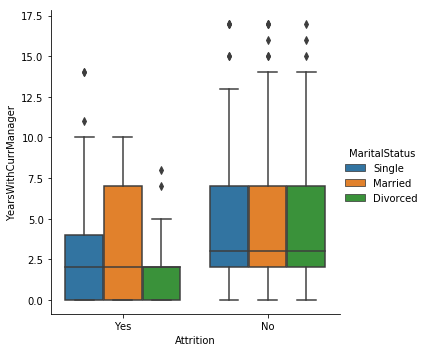

In [33]:
sns.catplot(x="Attrition", y="YearsWithCurrManager", hue="MaritalStatus", kind="box", data=df)
plt.show()


The difference in the number of "years at company" was similar to the difference in "years with current manager" between the jobs that were lost to attrition, and the ones that were not. 

The significant differences are found in "total working years", "years with company", "years in current role", "years with current manager", which suggests that attrition maybe linked to how management valued a certain job position.

Question: Is attrition more prevalent among job positions that lacked a long-term working relationship with management?

The dataset I studied was the "IBM HR Analytics Employee Attrition & Performance" dataset.  It contains information for over 1400 employees; information such as hourly rate, eductaion levels, job and environment satisfaction, gender, distance from home, business travel, years at company, and years with current manager, among many other data points.  It also tells us whether or not that job or job position was lost due to attrition.  

By definition, attrition can lead to a reduction in the workforce due to an employee retiring or quitting.  If it is ignored, it can negatively affect the competitivness of a company because of the potential loss of experience in a company's ranks, and the need to implement costly training programs to make up for the people that left.

Attrition doesn't always affect the lowest ranks of a company's workforce.  For example in our dataset, we saw that attrition affected a broad range of positions from the less technical Sales Representatives to the Science and Tech heavy Research Scientists.  After filtering our dataset by attrition value, we see that 47 of the 237 positions lost to attrition were of Research Scientists and 33 of the 237 positions lost were of sales representatives.  

talk about the categories where there are significant differences and how it lead you to your question of interest.  Than make a hypothesis.